This analysis examines a dataset containing taxi trips in New York City in 2019. The detailed description could be found on the website[сайті](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).  

The dataset contains the following columns:  
Here's the English translation of your description:

- `pickup` - trip start time  
- `dropoff` - trip end time  
- `passengers` - number of passengers on the trip  
- `distance` - trip distance  
- `fare` - base fare for the trip  
- `tip` - tip amount  
- `tolls` - toll fees (paid by the passenger as well)  
- `total` - total fare for the trip  
- `color` - color of the car used for the trip  
- `payment` - payment method  
- `pickup_zone` - zone where the trip started  
- `dropoff_zone` - zone where the trip ended  
- `pickup_borough` - borough where the trip started  
- `dropoff_borough` - borough where the trip ended  

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [31]:
pip install --upgrade matplotlib

     |████████████████████████████████| 7.4 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 37.8 MB/s eta 0:00:01
     |████████████████████████████████| 247 kB 33.7 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.2
    Uninstalling matplotlib-3.3.2:
      Successfully uninstalled matplotlib-3.3.2
Note: you may need to restart the kernel to use updated packages.


# 1 Preliminary data analysis 

In [2]:
df_taxi = sns.load_dataset('taxis')

__Let us output the first 3 records in the dataset, review the data types and data shape__

In [3]:
display(df_taxi.head(3), df_taxi.dtypes, df_taxi.shape)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


pickup              object
dropoff             object
passengers           int64
distance           float64
fare               float64
tip                float64
tolls              float64
total              float64
color               object
payment             object
pickup_zone         object
dropoff_zone        object
pickup_borough      object
dropoff_borough     object
dtype: object

(6433, 14)

__Let's check if there are any missing values in this dataset__

In [4]:
df_taxi.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

__Let us check why the data is missing. To do this, one displays the rows where the column with the most missing values has missing entries__

In [5]:
df_taxi[df_taxi['dropoff_borough'].isnull()]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.00,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN
711,2019-03-21 17:39:50,2019-03-21 18:12:54,2,1.74,17.0,4.26,0.00,25.56,yellow,credit card,Midtown East,NaN,Manhattan,NaN
739,2019-03-14 00:09:17,2019-03-14 00:09:21,1,0.03,2.5,0.00,0.00,3.80,yellow,cash,Upper East Side South,NaN,Manhattan,NaN
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.00,45.0,5.00,0.00,50.30,yellow,credit card,NaN,NaN,NaN,NaN
1108,2019-03-10 09:33:13,2019-03-10 09:52:04,1,13.40,52.0,11.70,5.76,70.26,yellow,credit card,NaN,NaN,NaN,NaN
1112,2019-03-12 19:09:23,2019-03-12 19:20:46,1,0.90,8.5,1.92,0.00,14.72,yellow,credit card,Times Sq/Theatre District,NaN,Manhattan,NaN
1230,2019-03-29 07:52:46,2019-03-29 08:02:40,1,0.90,5.5,1.76,0.00,10.56,yellow,credit card,Yorkville East,NaN,Manhattan,NaN
1690,2019-03-22 06:24:14,2019-03-22 06:24:14,1,0.00,72.0,0.00,0.00,72.00,yellow,NaN,East New York,NaN,Brooklyn,NaN
1787,2019-03-28 06:58:57,2019-03-28 07:18:10,1,6.32,20.5,4.26,0.00,25.56,yellow,credit card,Manhattan Valley,NaN,Manhattan,NaN


__Not every zone has a designated name in our system, and therefore it simply isn't recorded in the data__

__Let us fill in the missing values. Since all columns with missing values are of string type, one fills the missing values with the string 'NA'__

In [6]:
df_taxi_clean = df_taxi.fillna('NA')

In [7]:
df_taxi_clean.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

# 2 Main data analysis

__1: Let us look at the data over time. One converts the _Pickup_ column in the dataset to the datetime64[ns] format:__

In [8]:
date_cols = ['pickup']
df_taxi_clean[date_cols] = df_taxi_clean[date_cols].astype("datetime64[ns]")
df_taxi_clean.pickup.head(3)

0   2019-03-23 20:21:09
1   2019-03-04 16:11:55
2   2019-03-27 17:53:01
Name: pickup, dtype: datetime64[ns]

__2: The `pickup`column currently contains data in the date-time format. One removes the time and perform analytics by day:__

In [9]:
df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor('d')

__3: Let us group the data by `pickup_day` and plot a graph of total payments by day:__

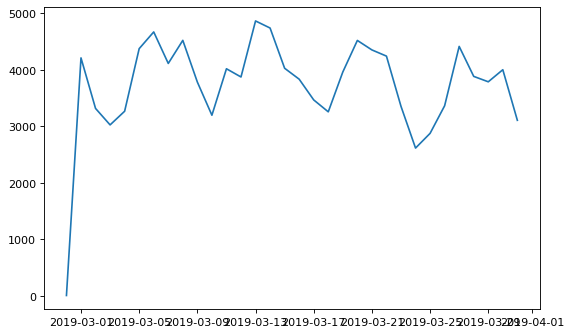

In [10]:
dff_1 = df_taxi_clean.groupby('pickup_day').sum(numeric_only = True)
plt.figure(figsize=(8,5), dpi=80)
plt.plot('total', data = dff_1);

__The unusual thing is that on all days, the total is between 3000 and 5000, but on one day, the total is close to zero__

__4: Let us output the number of rows for each `pickup_day`:__

In [11]:
dff_1['passengers']

pickup_day
2019-02-28      1
2019-03-01    370
2019-03-02    310
2019-03-03    264
2019-03-04    267
2019-03-05    382
2019-03-06    390
2019-03-07    331
2019-03-08    332
2019-03-09    325
2019-03-10    301
2019-03-11    316
2019-03-12    320
2019-03-13    355
2019-03-14    358
2019-03-15    299
2019-03-16    349
2019-03-17    278
2019-03-18    274
2019-03-19    292
2019-03-20    382
2019-03-21    320
2019-03-22    348
2019-03-23    340
2019-03-24    252
2019-03-25    234
2019-03-26    266
2019-03-27    352
2019-03-28    327
2019-03-29    312
2019-03-30    359
2019-03-31    296
Name: passengers, dtype: int64

__We see that for the date 2019-02-28, there is only one row. It seems like this entry was added by mistake. Let us delete the row from the `df_taxi_clean` dataset where `pickup_day` equals 2019-02-28. Then, one plots the graph of total payments by `pickup_day` again:__

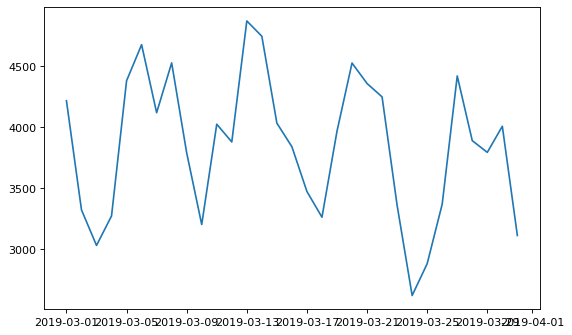

In [12]:
df_taxi_clean = df_taxi_clean[df_taxi_clean.pickup_day != '2019-02-28']
df_2 = df_taxi_clean.groupby('pickup_day').sum(numeric_only = True)
plt.figure(figsize=(8,5), dpi=80)
plt.plot('total', data = df_2);

__5: Let us look at the dynamics of total payments by boroughs. One creates a pivot table based on `df_taxi_clean`, where the rows are `pickup_day`, the columns are `pickup_borough`, and the values are the sum of payments. Also one removes the column where `pickup_borough` equals NA:__

In [13]:
borough_pivot = df_taxi_clean.pivot_table(index='pickup_day', columns='pickup_borough', values='total',aggfunc = 'sum')

borough_pivot = borough_pivot.drop('NA', axis = 1 )

borough_pivot.head(3)

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_day,,,,
2019-03-01,123.42,353.05,3169.47,553.29
2019-03-02,NaN,146.56,2716.33,456.13
2019-03-03,80.75,407.06,2100.23,428.73


__6: Let us see in which borough the highest daily taxi payments most frequently occur:__

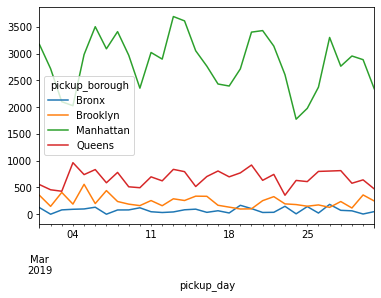

In [14]:
borough_pivot.fillna(0).plot();

__The highest daily taxi payments are in the Manhattan borough__

__7: Let us display histograms of the total daily payments for taxi rides in each borough:__

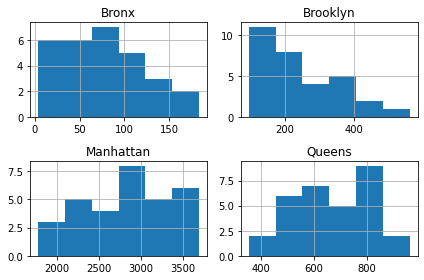

In [15]:
borough_pivot.hist(bins=6)
plt.tight_layout();

__One sees that on the individual histograms, we have different ranges of checks.__ 

__8: One would like to compare the distributions of daily payment totals by boroughs. To do this, let us display 4 histograms on one figure:__

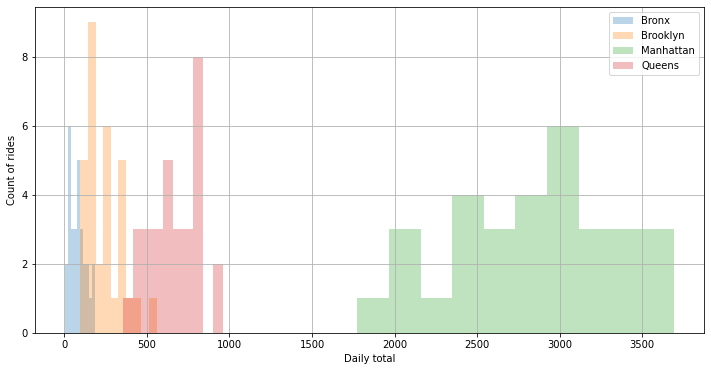

In [16]:
plt.figure(figsize=(12,6))
for col in borough_pivot:
    plt.hist(borough_pivot[col], bins=10, alpha=0.3, label= col) 
plt.xlabel('Daily total') 
plt.ylabel('Count of rides') 
plt.grid(True)
plt.legend()
plt.show();

__9: Let us display histograms of the sum of monthly payments by car color:__

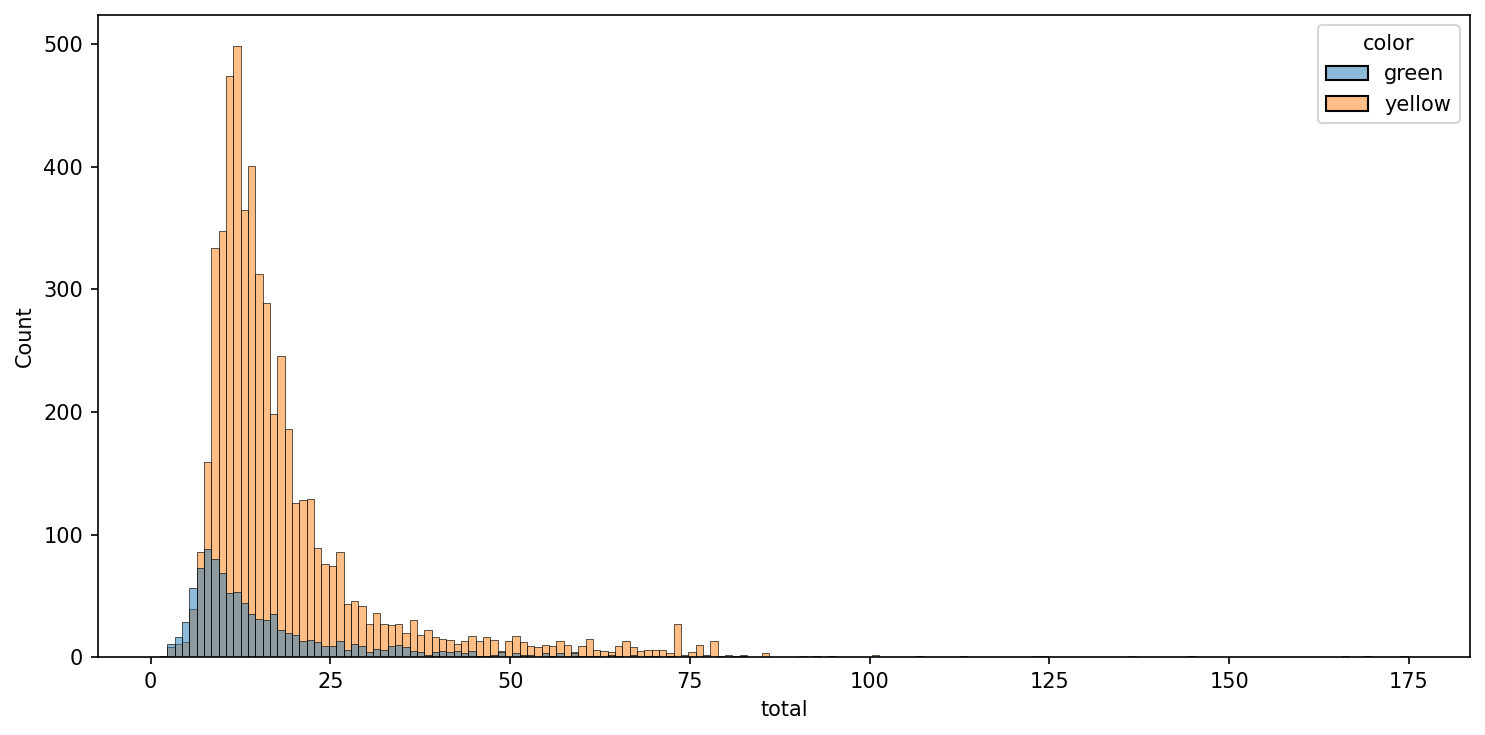

In [18]:
plt.figure(figsize=(10, 5), dpi=150)  
sns.histplot(x='total', hue='color', data=df_taxi_clean.sort_values('color'))
plt.tight_layout()
plt.show()

__10: Is there a relationship between the trip distance and the size of the tip? To investigate this, one creates a scatter plot between trip distance and tip size:__

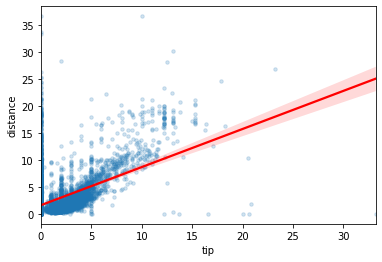

In [19]:
sns.regplot(
    data = df_taxi_clean,
    x = 'tip', y='distance', line_kws = {'color': 'red'}, scatter_kws={'s': 12, 'alpha': 0.2}
);

__The straight line of points, parallel to the axis on which the trip distance is plotted and positioned at the level of 0, indicates that some trips may have had no tips at all.__

__11: Let us plot the daily dynamics of tips by the boroughs where passengers were picked up:__

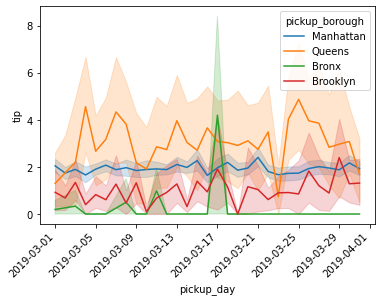

In [20]:
sns.lineplot(x='pickup_day', y='tip', hue='pickup_borough', data=df_taxi_clean[df_taxi_clean.pickup_borough!='NA'])
plt.xticks(rotation=45, ha='right');

__When starting a trip in the Bronx, tips are given the least often.  
When starting a trip in Queens, tips are given the most frequently.  
For trips from Manhattan, the tip amount is the most consistent.__

__12: Let us create a box plot of tip amounts by the borough (excluding `NA`) where the trip starts:__

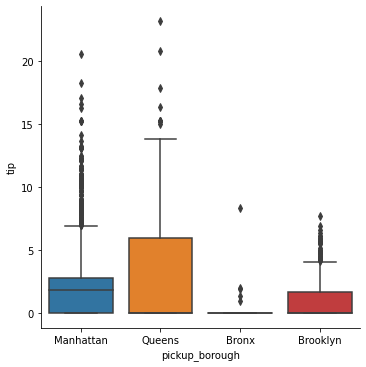

In [161]:
df_no_NA = df_taxi_clean[df_taxi_clean.pickup_borough != 'NA']
df_no_NA.head(50)
sns.catplot(data = df_no_NA, x="pickup_borough", y="tip", kind="box")

__13: Let us see if there is a correlation between the fare and the tip:__ 

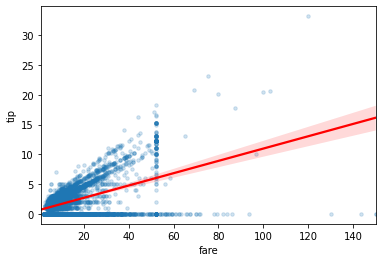

In [21]:
sns.regplot(
    data = df_taxi_clean,
    x = 'fare', y='tip', line_kws = {'color': 'red'}, scatter_kws={'s': 12, 'alpha': 0.2}
);

__One can observe that there is a group of people who, even for expensive trips, do not leave tips.  
Therefore, one should encourage people to leave tips (perhaps by offering them a small discount on their next trip)__

__14: Let us investigate the relationship between the trip starting location and the number of passengers:__  

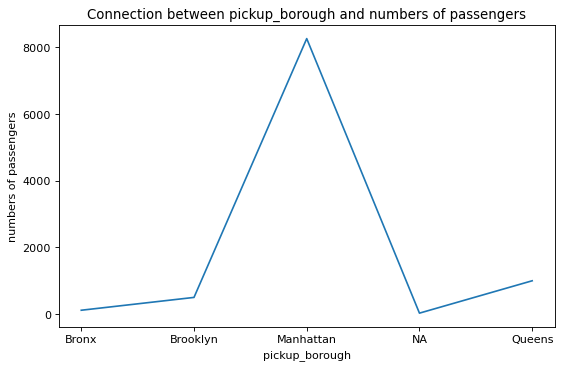

In [134]:
df_4 = df_taxi_clean.groupby('pickup_borough').sum()
plt.figure(figsize=(8,5), dpi=80)
plt.plot('passengers', data = df_4);
plt.title("Connection between pickup_borough and numbers of passengers")
plt.xlabel("pickup_borough")
plt.ylabel("numbers of passengers");

__One sees that the pickup borough located at Manhattan has the biggest amount of passengers.
This fact indicates that there should always be a sufficient number of cars available in this area.
Moreover, efforts should be made to increase the target audience in other boroughs (by increasing advertising or offering bonus deals).__

__15: Let us see if there is a correlation between the pickup borough and distance:__

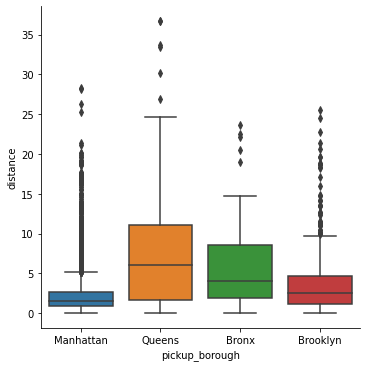

In [162]:
sns.catplot(data = df_no_NA, x="pickup_borough", y="distance", kind="box")

__One sees that trips starting in Manhattan are usually short in distance.  
Therefore, one could try to increase the trip distances, and with that, the profit as well.__